In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import os
# from sklearn.metrics import average_precision_score, roc_auc_score
from malnis import show

# plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(style = "whitegrid")
from itertools import accumulate, groupby

In [2]:
data_folder = "/home/jarobyte/scratch/malnis_dataset/data/"

In [3]:
train = pd.read_pickle(data_folder + "data_train.pkl")
show(train)

(7172, 9)


,query,document,summary,r1,r2,rl,sentences,relevance,original_sentences
7593,Due to the lack of structured knowledge applie...,"Index Terms—Machine learning, knowledge discov...","[Text classification [226], text clustering [2...",0.278846,0.095941,0.259615,"[Index Terms—Machine learning, knowledge disco...","[False, False, False, False, False, False, Fal...",685
7554,Obtaining enough labeled data to robustly trai...,One of the greatest roadblocks to using modern...,"[“Lawyer”); moreover, these sources might be c...",0.295455,0.104247,0.272727,[One of the greatest roadblocks to using moder...,"[True, False, True, False, False, False, False...",246
4892,"Word embeddings, i.e., low-dimensional vector ...",Recently some studies have shown that text cla...,"[A recent work (Schuster et al., 2020) showed ...",0.407018,0.186364,0.385965,[Recently some studies have shown that text cl...,"[False, False, True, False, False, False, Fals...",202
4169,"In this paper our objectives are, first, netwo...",It is commonsense that how you look at an obje...,"[Views are commonly different sensory signals,...",0.257143,0.090909,0.250000,[It is commonsense that how you look at an obj...,"[False, False, False, False, False, False, Fal...",240
6690,"This paper describes TextTiling, an algorithm ...",Accurately representing the distance between t...,[Most similar to our method is that of Wan (20...,0.206349,0.037975,0.158730,[Accurately representing the distance between ...,"[False, False, False, False, False, False, Fal...",246


In [4]:
data = pd.read_pickle("../data/sentence_labels.pkl")
show(data)

(8965, 8)


,query,document,summary,r1,r2,rl,sentences,relevance
0,We introduce a new language representation mod...,"KEYWORDS cascade ranking, pre-trained language...",[Our approach is mainly based on the BERT lang...,0.237885,0.065359,0.229075,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
1,The dominant sequence transduction models are ...,"KEYWORDS cascade ranking, pre-trained language...",[BERT [2] is a self-supervised approach for pr...,0.238372,0.063366,0.215116,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."
2,Language model pretraining has led to signific...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.172727,0.047782,0.172727,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."
3,With the capability of modeling bidirectional ...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.237838,0.078740,0.227027,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Tru..."
4,Neural sequence-to-sequence models have provid...,"KEYWORDS cascade ranking, pre-trained language...",[The proposed model is based on the pointer-ge...,0.215139,0.093023,0.199203,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."


In [6]:
raw_train = data.iloc[train.index]
show(raw_train)

(7172, 8)


,query,document,summary,r1,r2,rl,sentences,relevance
57,Due to the lack of structured knowledge applie...,"Index Terms—Machine learning, knowledge discov...","[Text classification [226], text clustering [2...",0.278846,0.095941,0.259615,"[Index Terms—Machine learning, knowledge disco...","[False, False, False, False, False, False, Fal..."
18,Obtaining enough labeled data to robustly trai...,One of the greatest roadblocks to using modern...,"[“Lawyer”); moreover, these sources might be c...",0.295455,0.104247,0.272727,[One of the greatest roadblocks to using moder...,"[True, False, True, False, False, False, False..."
3,"Word embeddings, i.e., low-dimensional vector ...",Recently some studies have shown that text cla...,"[A recent work (Schuster et al., 2020) showed ...",0.407018,0.186364,0.385965,[Recently some studies have shown that text cl...,"[False, False, True, False, False, False, Fals..."
66,"In this paper our objectives are, first, netwo...",It is commonsense that how you look at an obje...,"[Views are commonly different sensory signals,...",0.257143,0.090909,0.250000,[It is commonsense that how you look at an obj...,"[False, False, False, False, False, False, Fal..."
71,"This paper describes TextTiling, an algorithm ...",Accurately representing the distance between t...,[Most similar to our method is that of Wan (20...,0.206349,0.037975,0.158730,[Accurately representing the distance between ...,"[False, False, False, False, False, False, Fal..."


In [7]:
raw_train.relevance.map(len).describe()

count    7172.000000
mean      352.546152
std       311.406426
min         3.000000
25%       203.000000
50%       254.000000
75%       375.000000
max      4447.000000
Name: relevance, dtype: float64

# Plots

In [8]:
# lines = raw_train.relevance.map(lambda x: [(1.0, i/len(x))  if y else (0.0, i/len(x)) for i, y in enumerate(x)])
# lines[0]

In [9]:
lines = raw_train.relevance.map(
    lambda x: (
        [i/len(x) for i, y in enumerate(x)],
        [1.0 if y else 0.0 for y in x],
    )
)
lines[0]

0    ([0.0, 0.006024096385542169, 0.012048192771084...
0    ([0.0, 0.0010905125408942203, 0.00218102508178...
0    ([0.0, 0.0015015015015015015, 0.00300300300300...
0    ([0.0, 0.0048543689320388345, 0.00970873786407...
0    ([0.0, 0.0031545741324921135, 0.00630914826498...
                           ...                        
0    ([0.0, 0.0035714285714285713, 0.00714285714285...
0    ([0.0, 0.0009587727708533077, 0.00191754554170...
0    ([0.0, 0.004694835680751174, 0.009389671361502...
0    ([0.0, 0.0021691973969631237, 0.00433839479392...
0    ([0.0, 0.003875968992248062, 0.007751937984496...
Name: relevance, Length: 87, dtype: object

/tmp/ipykernel_3179843/2394907394.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  for x, y in lines[:3]:


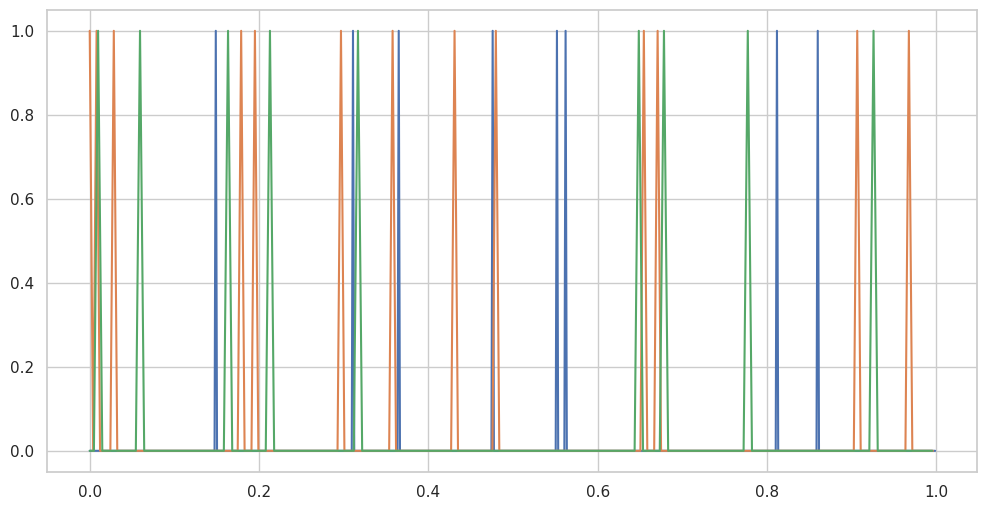

In [10]:
plt.subplots(figsize = (12, 6))
for x, y in lines[:3]:
    plt.plot(x, y)
plt.show()

# mean interval length

In [16]:
spans = raw_train.relevance.map(lambda x: [y for y in [list(g) for k, g in groupby(x)] if y[0]])\
.map(lambda x: [len(l) for l in x])

show(spans)

(7172,)


57                   [1, 1, 1, 1, 1, 1, 1, 1]
18    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
3                 [1, 1, 1, 1, 1, 1, 1, 1, 1]
66          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
71                                     [1, 1]
Name: relevance, dtype: object

In [12]:
sum([len(x) for x in spans])

73946

In [13]:
unpacked = pd.Series([x for l in spans for x in l])
unpacked.describe()

count    73946.000000
mean         1.053972
std          0.242978
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
dtype: float64

In [14]:
print(
    (unpacked.value_counts(normalize = True) * 100).to_latex()
)

\begin{tabular}{lr}
\toprule
{} &          0 \\
\midrule
1 &  94.953074 \\
2 &   4.739945 \\
3 &   0.269115 \\
4 &   0.032456 \\
5 &   0.005409 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_3179843/1246959685.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  (unpacked.value_counts(normalize = True) * 100).to_latex()


In [15]:
sum(unpacked != 1)

3732

# mean span number

In [40]:
span_fraction = spans.map(len) / raw_train.relevance.map(len)
show(span_fraction)

(7172,)


57    0.011679
18    0.052846
3     0.044554
66    0.045833
71    0.008130
Name: relevance, dtype: float64

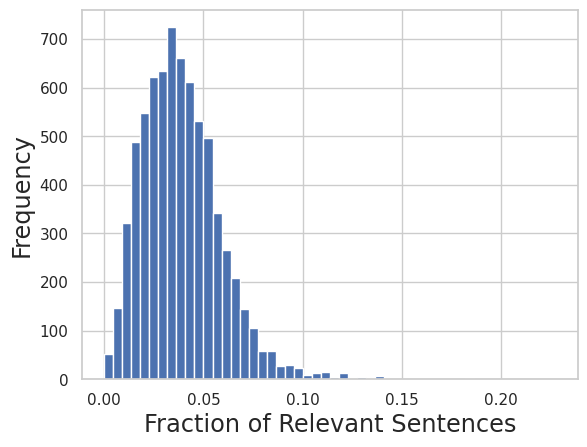

In [52]:
span_fraction.plot.hist(bins = 50)
plt.xlabel("Fraction of Relevant Sentences", fontsize = "x-large")
plt.ylabel("Frequency", fontsize = "x-large")
plt.show()

In [60]:
print(span_fraction.describe(
#     percentiles = np.linspace(0, 1,11)
).round(4).to_frame().style.to_latex())

\begin{tabular}{lr}
 & relevance \\
count & 7172.000000 \\
mean & 0.039000 \\
std & 0.020000 \\
min & 0.000000 \\
25% & 0.024300 \\
50% & 0.036600 \\
75% & 0.050300 \\
max & 0.227300 \\
\end{tabular}



In [39]:
print(spans.map(len).describe().to_frame().style.to_latex())

\begin{tabular}{lr}
 & relevance \\
count & 7172.000000 \\
mean & 10.310374 \\
std & 3.824506 \\
min & 0.000000 \\
25% & 8.000000 \\
50% & 10.000000 \\
75% & 13.000000 \\
max & 43.000000 \\
\end{tabular}



In [21]:
spans.map(len).describe(percentiles = np.linspace(0, 1, 11))

count    7172.000000
mean       10.310374
std         3.824506
min         0.000000
0%          0.000000
10%         6.000000
20%         7.000000
30%         8.000000
40%         9.000000
50%        10.000000
60%        11.000000
70%        12.000000
80%        13.000000
90%        15.000000
100%       43.000000
max        43.000000
Name: relevance, dtype: float64

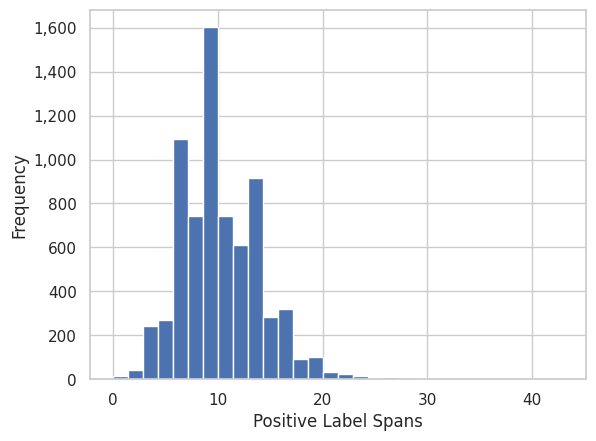

In [29]:
spans.map(len).plot.hist(bins = 30)
plt.xlabel("Positive Label Spans")
t = range(0, 1800, 200)
plt.yticks(ticks = t, labels = [f"{s:,}" for s in t])
plt.show()